# ***Issue Integration***

In [2]:
import gspread
import pandas as pd

key = "API Key"
gc = gspread.api_key(key)
sh = gc.open_by_key("API Key")
worksheet = sh.sheet1
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [5]:
df_en = df.loc[df["language"].eq("en"), :]
tickets = df_en.loc[:, ["subject", "body"]].apply(lambda x: f"Subject: {x['subject']} \n\n\n Body: {x['body']}", axis=1)
print(df_en.head())
tickets[0]

              id                                            subject  \
0  1001352387736  Urgent: Critical impact on enterprise network ...   
1  1004699418379     Intermittent Cursor Freezing Issue on Dell XPS   
5  1024619926727    Exchange Request for Malfunctioning Dell XPS 13   
6  1026487543175       Request for Server Administration Assistance   
7  1027850274374   Immediate Attention Required: AWS Outage Concern   

                                                body  \
0  Dear Customer Support Team, We are experiencin...   
1  Dear Customer Support,<br><br>I hope this mess...   
5  Dear Tech Online Store Customer Support,\n\n\n...   
6  Dear IT Services Customer Support, \n\n\nWe ar...   
7  Greetings IT Services Customer Support,\n\n\nI...   

                                              answer      type  \
0  Subject: Re: Urgent: Critical impact on enterp...  Incident   
1  Dear <name>,\n\n\nThank you for reaching out r...  Incident   
5  Dear <name>,\n\n\nThank you for rea

'Subject: Urgent: Critical impact on enterprise network connectivity \n\n\n Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>'

In [7]:
all_tags = []
for index, row in df_en.iterrows():
    tags = []
    for i in range(1, 4):  # Iterate through tag_1 to tag_3
        tag_value = row[f"tag_{i}"]
        if pd.notna(tag_value) and tag_value != '':
            tags.extend(str(tag_value).split())
    all_tags.extend(tags)

# Calculate value counts for the combined tags
from collections import Counter
tag_counts = Counter(all_tags)
print(tag_counts.most_common(100)) # Print the 10 most common words

[('Support', 447), ('Technical', 262), ('Issue', 215), ('Urgent', 133), ('Service', 105), ('Product', 104), ('IT', 98), ('Network', 51), ('Disruption', 48), ('Software', 47), ('Bug', 47), ('Failure', 35), ('Hardware', 34), ('Customer', 29), ('Problem', 26), ('Resolution', 26), ('Billing', 24), ('Inquiry', 24), ('Outage', 20), ('General', 16), ('Account', 16), ('Assistance', 16), ('Performance', 15), ('Tuning', 15), ('Guidance', 15), ('System', 14), ('Returns', 11), ('and', 11), ('Exchanges', 11), ('Request', 11), ('Maintenance', 10), ('Incident', 9), ('Report', 9), ('Sales', 8), ('Payment', 6), ('Processing', 6), ('Feature', 6), ('Notification', 5), ('Warranty', 5), ('Claim', 5), ('Crash', 5), ('Setup', 4), ('Refund', 4), ('Order', 4), ('Printer', 3), ('Login', 3), ('Replacement', 2), ('Wireless', 2), ('Services', 2), ('Cost', 2), ('Recovery', 2), ('Management', 2), ('Consulting', 1), ('Data', 1), ('Breach', 1), ('Feedback', 1), ('Password', 1), ('Reset', 1), ('Email', 1), ('Access', 1

In [18]:
# def should_escalate(incoming_issue):
#     if incoming_issue["priority"] == "high":
#         tags_combined = " ".join([incoming_issue[f"tag_{i+1}"] for i in range(0, 9)])
#         for key in ["Disruption", "Failure", "Outage", "Incident", "Crash", "Breach", "Critical"]:
#             if key.lower() in tags_combined.lower():
#                 return "VERY_HIGH"

#         for key in ["{NEW_KEYWORDS}"]:
#             if key.lower() in tags_combined.lower():
#                 return "HIGH"

#     return False

import pandas as pd

def should_escalate(incoming_issue):
    """
    Enhanced escalation with detailed status tracking.

    Args:
        incoming_issue (pd.Series): Single issue data.

    Returns:
        dict: Escalation details
    """
    # Predefined critical and high-risk keywords
    critical_keywords = [
        "Disruption", "Failure", "Outage",
        "Incident", "Crash", "Breach", "Critical"
    ]

    # Default result
    result = {
        "escalation_status": False,
        "reason": "Not Escalated",
        "matched_keywords": []
    }

    # Check priority first
    if incoming_issue.get("priority", "").lower() != "high":
        result["reason"] = "Low Priority"
        return result

    # Combine all tags
    tags_combined = " ".join([
        str(incoming_issue.get(f"tag_{i+1}", ""))
        for i in range(9)
    ]).lower()

    # Check critical keywords
    for key in critical_keywords:
        if key.lower() in tags_combined:
            result["escalation_status"] = "VERY_HIGH"
            result["reason"] = f"Matched Critical Keyword: {key}"
            result["matched_keywords"].append(key)
            return result

    return result

# Detailed tracking function
def track_escalations(df):
    escalation_results = []

    for _, row in df.iterrows():
        escalation_info = should_escalate(row)

        # Combine original issue data with escalation info
        result_row = {
            "issue_id": row.get("id", "N/A"),
            "priority": row.get("priority", "N/A"),
            "escalation_status": escalation_info["escalation_status"],
            "reason": escalation_info["reason"],
            "matched_keywords": ", ".join(escalation_info["matched_keywords"])
        }
        escalation_results.append(result_row)

    return pd.DataFrame(escalation_results)

# Main execution
escalation_df = track_escalations(df_en.iloc[:30])
escalation_df

# Summary statistics
# print("\nEscalation Summary:")
# print(escalation_df["escalation_status"].value_counts())

,issue_id,priority,escalation_status,reason,matched_keywords
0,1001352387736,high,VERY_HIGH,Matched Critical Keyword: Disruption,Disruption
1,1004699418379,low,False,Low Priority,
2,1024619926727,medium,False,Low Priority,
3,1026487543175,medium,False,Low Priority,
4,1027850274374,high,VERY_HIGH,Matched Critical Keyword: Outage,Outage
5,1030547538129,high,False,Not Escalated,
6,1035944507425,medium,False,Low Priority,
7,1040536037564,high,VERY_HIGH,Matched Critical Keyword: Disruption,Disruption
8,1067119038782,medium,False,Low Priority,
9,1076159728172,low,False,Low Priority,


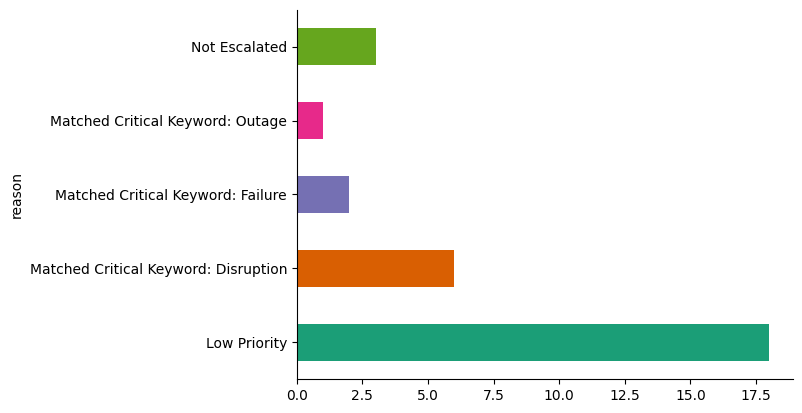

In [19]:
# @title reason

from matplotlib import pyplot as plt
import seaborn as sns
escalation_df.groupby('reason').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')

def should_escalate(incoming_issue, additional_keywords=None):
    """
    Determine escalation level based on priority and tags.

    Args:
        incoming_issue (pd.Series): Issue data.
        additional_keywords (list, optional): Extra keywords for escalation.

    Returns:
        str: Escalation level or False.
    """
    # Critical keywords for immediate escalation
    critical_keywords = [
        "Disruption", "Failure", "Outage",
        "Incident", "Crash", "Breach", "Critical"
    ]

    # Validate input
    if not isinstance(incoming_issue, (pd.Series, dict)):
        logging.warning(f"Invalid input type: {type(incoming_issue)}")
        return False

    try:
        # Check priority first
        if incoming_issue.get("priority", "").lower() != "high":
            return False

        # Combine tags into a single string
        tags_combined = " ".join(
            str(incoming_issue.get(f"tag_{i+1}", ""))
            for i in range(9)
        ).lower()

        # Check for critical keywords
        for key in critical_keywords:
            if key.lower() in tags_combined:
                logging.info(f"VERY_HIGH escalation due to keyword: {key}")
                return "VERY_HIGH"

        # Check additional keywords if provided
        if additional_keywords:
            for key in additional_keywords:
                if key.lower() in tags_combined:
                    logging.info(f"HIGH escalation due to keyword: {key}")
                    return "HIGH"

    except Exception as e:
        logging.error(f"Escalation check error: {e}")
        return False

    return False

def analyze_escalations(df):
    """
    Analyze escalations across the dataset.

    Args:
        df (pd.DataFrame): Input dataframe.

    Returns:
        dict: Escalation statistics.
    """
    escalation_results = []
    for _, row in df.iterrows():
        result = should_escalate(row)
        escalation_results.append(result)

    escalation_stats = {
        'total_issues': len(df),
        'very_high_escalations': escalation_results.count('VERY_HIGH'),
        'high_escalations': escalation_results.count('HIGH'),
        'non_escalated': escalation_results.count(False)
    }

    # Print summary
    print("\nEscalation Analysis:")
    for key, value in escalation_stats.items():
        print(f"{key}: {value}")

    return escalation_stats

# Example usage
def main():
    # Assuming df_en is your dataframe
    # Additional keywords can be passed dynamically
    additional_keywords = ["Performance", "Security"]

    # Analyze first 20 rows with detailed output
    print("\nDetailed Escalation Check (First 20 Rows):")
    for i in range(20):
        row = df_en.iloc[i]
        escalation = should_escalate(row, additional_keywords)
        print(f"Row {i}: {escalation}")

    # Overall dataset analysis
    analyze_escalations(df_en)

if __name__ == "__main__":
    main()


Detailed Escalation Check (First 20 Rows):
Row 0: VERY_HIGH
Row 1: False
Row 2: False
Row 3: False
Row 4: VERY_HIGH
Row 5: False
Row 6: False
Row 7: VERY_HIGH
Row 8: False
Row 9: False
Row 10: False
Row 11: False
Row 12: VERY_HIGH
Row 13: False
Row 14: False
Row 15: False
Row 16: False
Row 17: VERY_HIGH
Row 18: VERY_HIGH
Row 19: False

Escalation Analysis:
total_issues: 339
very_high_escalations: 115
high_escalations: 0
non_escalated: 224
